<a href="https://colab.research.google.com/github/NithishaRaghavaraju/Garbage-Classifier-ml-code/blob/main/GC_MultiMLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Constructing the DataFrame**

In [18]:
import pandas as pd
import os
import zipfile

In [19]:


# 1. Unzipping the file
with zipfile.ZipFile('/content/drive/MyDrive/Capstone/Project_A.zip', 'r') as zip_ref:
    zip_ref.extractall('pp1')



In [20]:
# 2. Reading the Directory Structure
image_paths = []
labels = []

for root, dirs, files in os.walk('pp1/Project_A'):
    for file in files:
        # Assuming images are .jpg (modify this if there are other formats)
        if file.endswith('.jpg'):
            image_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))


# 3. Constructing the DataFrame
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

print(df.head())


                         image_path  label
0  pp1/Project_A/paper/paper759.jpg  paper
1  pp1/Project_A/paper/paper509.jpg  paper
2  pp1/Project_A/paper/paper427.jpg  paper
3  pp1/Project_A/paper/paper634.jpg  paper
4  pp1/Project_A/paper/paper659.jpg  paper


In [21]:
print(df.head())

                         image_path  label
0  pp1/Project_A/paper/paper759.jpg  paper
1  pp1/Project_A/paper/paper509.jpg  paper
2  pp1/Project_A/paper/paper427.jpg  paper
3  pp1/Project_A/paper/paper634.jpg  paper
4  pp1/Project_A/paper/paper659.jpg  paper


In [22]:
df

image_path    label
0           pp1/Project_A/paper/paper759.jpg    paper
1           pp1/Project_A/paper/paper509.jpg    paper
2           pp1/Project_A/paper/paper427.jpg    paper
3           pp1/Project_A/paper/paper634.jpg    paper
4           pp1/Project_A/paper/paper659.jpg    paper
...                                      ...      ...
15510   pp1/Project_A/clothes/clothes186.jpg  clothes
15511  pp1/Project_A/clothes/clothes3232.jpg  clothes
15512  pp1/Project_A/clothes/clothes5072.jpg  clothes
15513  pp1/Project_A/clothes/clothes1526.jpg  clothes
15514  pp1/Project_A/clothes/clothes3260.jpg  clothes

[15515 rows x 2 columns]

**Collecting Some Random Image Data**

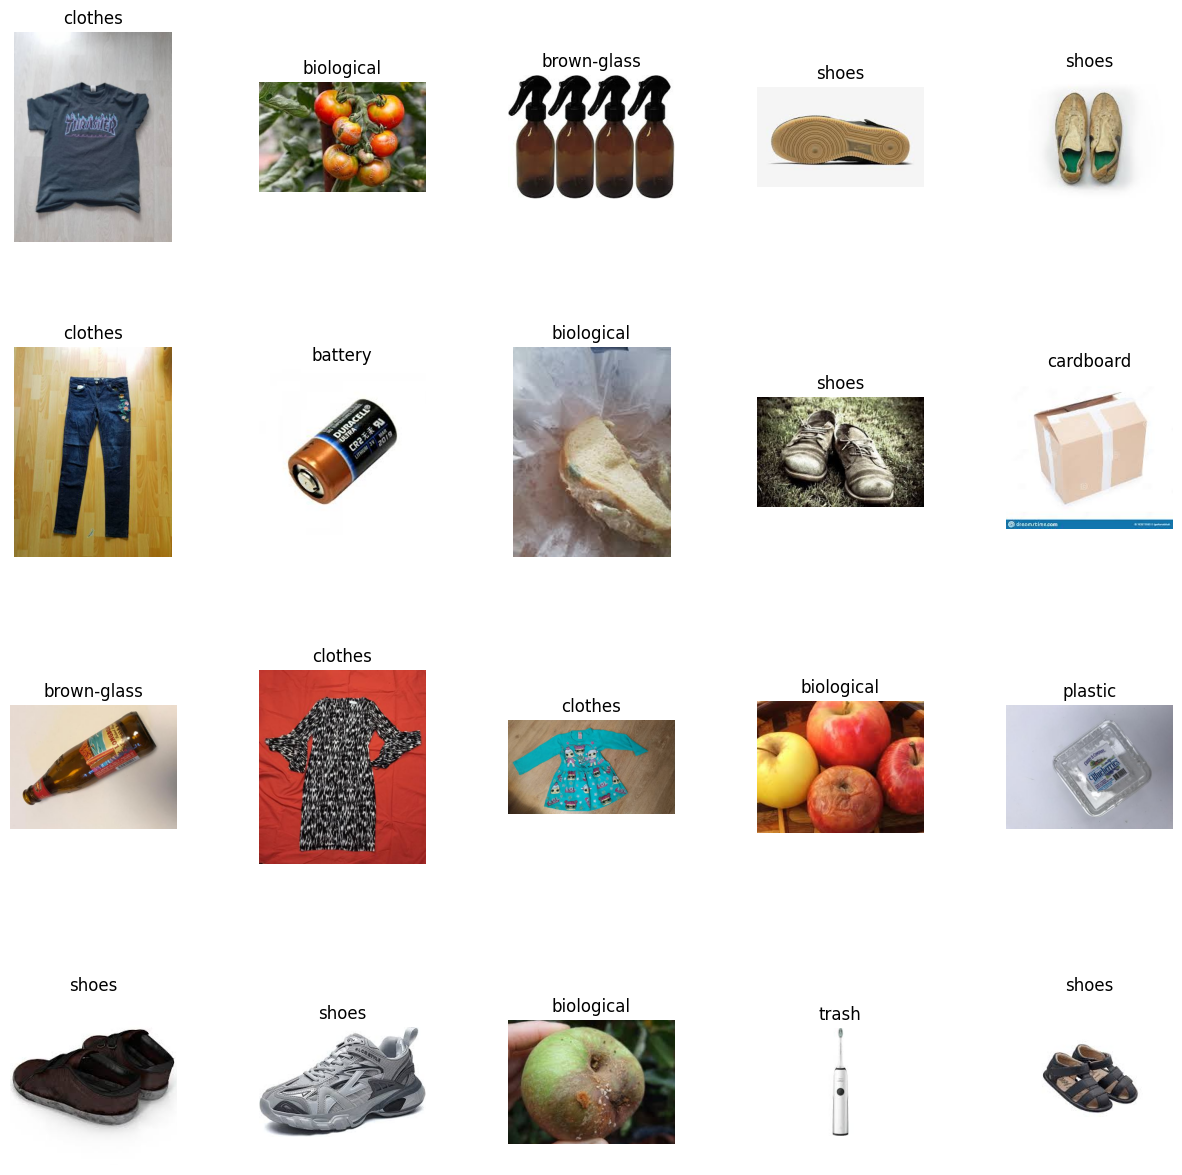

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


# Reading the Directory Structure with filtering
image_paths = []
labels = []

for root, dirs, files in os.walk('pp1/Project_A'):
    for file in files:
        # Ignore macOS metadata files and ensure the file is a .jpg
        if not file.startswith("._") and file.endswith('.jpg'):
            image_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# Reconstructing the DataFrame with filtered lists
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

# Sampling and plotting the images (as before)
sample_df = df.sample(n=20)

# Plot the images
fig, axes = plt.subplots(4, 5, figsize=(15, 15))
axes = axes.ravel()

for i in range(20):
    img_path = sample_df.iloc[i]['image_path']
    label = sample_df.iloc[i]['label']

    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(label, fontsize=12)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

**Constructing a DataFrame with Image Data**

In [8]:
import os
import pandas as pd
from PIL import Image

# 1. Collecting the image data
image_data = []

for root, dirs, files in os.walk('pp1/Project_A'):
    for file in files:
        if not file.startswith("._") and file.endswith('.jpg'):
            file_path = os.path.join(root, file)
            with Image.open(file_path) as img:
                width, height = img.size
                image_data.append({
                    'image_id': os.path.splitext(file)[0], # Assuming image_id is the file name without extension
                    'image': img,
                    'image_size': f"{width}x{height}",
                    'category': os.path.basename(root)
                })

# 2. Constructing the DataFrame
df = pd.DataFrame(image_data)
df.head()


image_id                                              image image_size  \
0  paper759  <PIL.JpegImagePlugin.JpegImageFile image mode=...    512x384   
1  paper509  <PIL.JpegImagePlugin.JpegImageFile image mode=...    512x384   
2  paper427  <PIL.JpegImagePlugin.JpegImageFile image mode=...    299x168   
3  paper634  <PIL.JpegImagePlugin.JpegImageFile image mode=...    512x384   
4  paper659  <PIL.JpegImagePlugin.JpegImageFile image mode=...    512x384   

  category  
0    paper  
1    paper  
2    paper  
3    paper  
4    paper

**Resizing images**

In [9]:
import os
import pandas as pd
from PIL import Image

# 1. Collecting the image data
image_data = []

for root, dirs, files in os.walk('pp1/Project_A'):
    i= 0
    for file in files:
        i+=1

        if not file.startswith("._") and file.endswith('.jpg'):
            file_path = os.path.join(root, file)
            img = Image.open(file_path)  # Open the image without the 'with' statement
            width, height = img.size
            image_data.append({
                'image_id': os.path.splitext(file)[0],  # Assuming image_id is the file name without extension
                'image': img,
                'image_path': file_path,  # Storing the file path for potential future use
                'image_size': f"{width}x{height}",
                'category': os.path.basename(root)
            })

# 2. Constructing the DataFrame
df = pd.DataFrame(image_data)

# 3. Resizing the images
def resize_image(input_image, target_size=(128, 128)):
    """Resize a PIL Image to the target size."""
    return input_image.resize(target_size)

df['resized_image'] = df['image'].apply(lambda img: resize_image(img, (128, 128)))

# Display the updated DataFrame
df.head()


image_id                                              image  \
0  paper759  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1  paper509  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
2  paper427  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
3  paper634  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
4  paper659  <PIL.JpegImagePlugin.JpegImageFile image mode=...   

                         image_path image_size category  \
0  pp1/Project_A/paper/paper759.jpg    512x384    paper   
1  pp1/Project_A/paper/paper509.jpg    512x384    paper   
2  pp1/Project_A/paper/paper427.jpg    299x168    paper   
3  pp1/Project_A/paper/paper634.jpg    512x384    paper   
4  pp1/Project_A/paper/paper659.jpg    512x384    paper   

                                       resized_image  
0  <PIL.Image.Image image mode=RGB size=128x128 a...  
1  <PIL.Image.Image image mode=RGB size=128x128 a...  
2  <PIL.Image.Image image mode=RGB size=128x128 a...  
3  <PIL.Image.Image image mode=RGB size=128x128 a...  
4  <PIL.Image.Image image mode=RGB size=128x128 a...

**Sample Images from Each Category**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

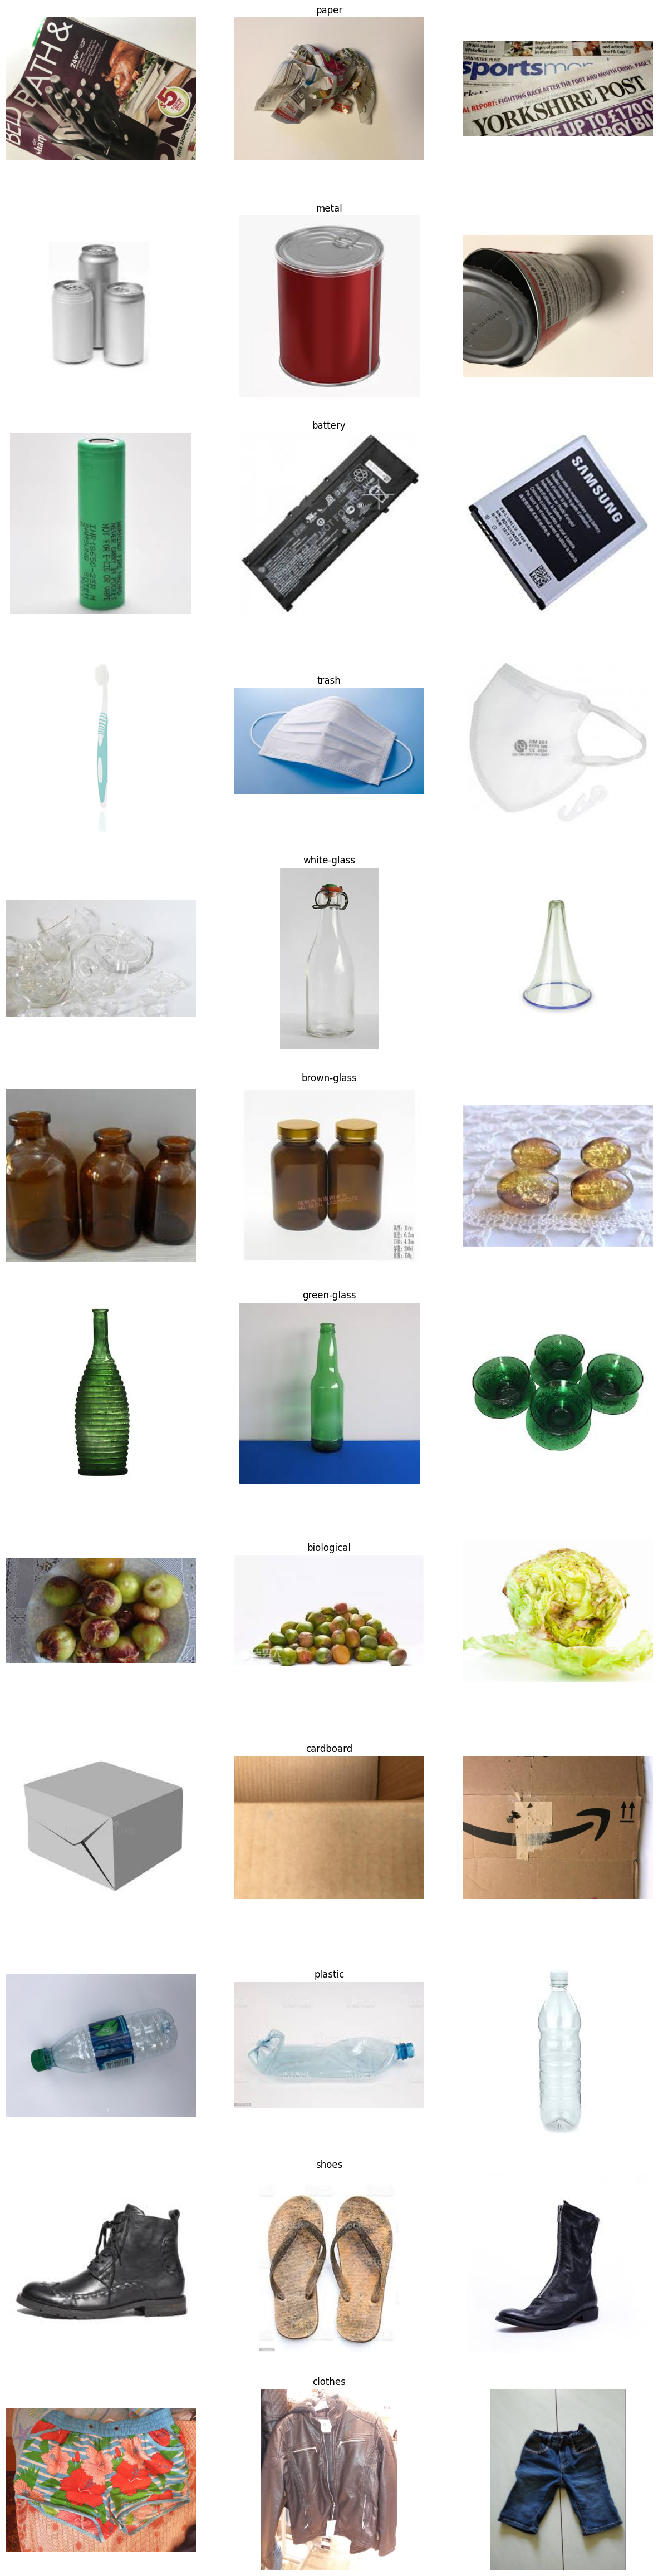

In [11]:
#Sample Images from Each Category:
categories = df['category'].unique()
fig, axes = plt.subplots(len(categories), 3, figsize=(15, 5 * len(categories)))

for i, category in enumerate(categories):
    sample_images = df[df['category'] == category]['image'].sample(3)
    for j, img in enumerate(sample_images):
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 1:
            axes[i, j].set_title(category)

plt.show()

# **Exploratory Data Analysis (EDA)**

**Step 1: Import Libraries and Load Data**

In [12]:
import pandas as pd
import plotly.express as px

# Load the dataset
data = df
data

image_id                                              image  \
0         paper759  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1         paper509  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
2         paper427  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
3         paper634  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
4         paper659  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
...            ...                                                ...   
15510   clothes186  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
15511  clothes3232  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
15512  clothes5072  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
15513  clothes1526  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
15514  clothes3260  <PIL.JpegImagePlugin.JpegImageFile image mode=...   

                                  image_path image_size category  \
0           pp1/Project_A/paper/paper759.jpg    512x384    paper   
1           pp1/Project_A/paper/paper509.jpg    512x384    paper   
2           pp1/Project_A/paper/paper427.jpg    299x168    paper   
3           pp1/Project_A/paper/paper634.jpg    512x384    paper   
4           pp1/Project_A/paper/paper659.jpg    512x384    paper   
...                                      ...        ...      ...   
15510   pp1/Project_A/clothes/clothes186.jpg    400x533  clothes   
15511  pp1/Project_A/clothes/clothes3232.jpg    400x605  clothes   
15512  pp1/Project_A/clothes/clothes5072.jpg    400x533  clothes   
15513  pp1/Project_A/clothes/clothes1526.jpg    400x533  clothes   
15514  pp1/Project_A/clothes/clothes3260.jpg    400x533  clothes   

                                           resized_image  
0      <PIL.Image.Image image mode=RGB size=128x128 a...  
1      <PIL.Image.Image image mode=RGB size=128x128 a...  
2      <PIL.Image.Image image mode=RGB size=128x128 a...  
3      <PIL.Image.Image image mode=RGB size=128x128 a...  
4      <PIL.Image.Image image mode=RGB size=128x128 a...  
...                                                  ...  
15510  <PIL.Image.Image image mode=RGB size=128x128 a...  
15511  <PIL.Image.Image image mode=RGB size=128x128 a...  
15512  <PIL.Image.Image image mode=RGB size=128x128 a...  
15513  <PIL.Image.Image image mode=RGB size=128x128 a...  
15514  <PIL.Image.Image image mode=RGB size=128x128 a...  

[15515 rows x 6 columns]

**Step 2: Data Cleaning**

First, check for missing values and duplicate rows.

In [13]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Remove duplicate rows
data = data.drop_duplicates(subset=['image_id'])

image_id         0
image            0
image_path       0
image_size       0
category         0
resized_image    0
dtype: int64


**Step 3: Summary Statistics**

Calculate summary statistics for key variables, primarily focusing on your target variable and selected features.

In [14]:
# Summary statistics for the target variable
target_summary = data['category'].describe()

# Summary statistics for selected features
features_summary = data['image_size'].describe()

print('Target Summary\n',target_summary)
print('\nFeatures Summary\n',features_summary)

Target Summary
 count       15515
unique         12
top       clothes
freq         5325
Name: category, dtype: object

Features Summary
 count       15515
unique        892
top       400x533
freq         2590
Name: image_size, dtype: object


In [15]:
import pandas as pd

# Summary statistics for the 'category' column
category_summary = df['category'].value_counts()
category_percentage = df['category'].value_counts(normalize=True) * 100

# Summary statistics for the 'image_size' column
image_size_summary = df['image_size'].value_counts()

# Display the results
print("Summary Statistics for 'category' Variable:")
print(category_summary)
print("\nPercentage Distribution of 'category' Variable:")
print(category_percentage)
print("\nSummary Statistics for 'image_size' Variable:")
print(image_size_summary)


Summary Statistics for 'category' Variable:
clothes        5325
shoes          1977
paper          1050
biological      985
battery         945
cardboard       891
plastic         865
white-glass     775
metal           769
trash           697
green-glass     629
brown-glass     607
Name: category, dtype: int64

Percentage Distribution of 'category' Variable:
clothes        34.321624
shoes          12.742507
paper           6.767644
biological      6.348695
battery         6.090880
cardboard       5.742830
plastic         5.575250
white-glass     4.995166
metal           4.956494
trash           4.492427
green-glass     4.054141
brown-glass     3.912343
Name: category, dtype: float64

Summary Statistics for 'image_size' Variable:
400x533    2590
512x384    2358
225x225    2004
400x534    1077
275x183     691
           ... 
255x158       1
250x176       1
346x146       1
230x169       1
400x605       1
Name: image_size, Length: 892, dtype: int64


**Step 4: Data Visualization**

Use Plotly Express to create visualizations. For instance, you can create a histogram to visualize the distribution of the target variable and a scatter plot to explore the relationship between image size and the target variable (category).

In [24]:
import plotly.express as px

# Prepare the data for Plotly Express
df_counts = df['label'].value_counts().reset_index()
df_counts.columns = ['Garbage Type', 'Counts']

# Create a bar chart using Plotly Express
fig = px.bar(df_counts,
              x='Garbage Type',
              y='Counts',
              title='No. of Counts for Each Type of Garbage',


              category_orders={"Garbage Type": df_counts['Garbage Type'].tolist()},
              text='Counts',  # Add count labels on top of the bars
              color_discrete_sequence=px.colors.qualitative.Dark2)  # Set color scheme

 # Customize the layout
fig.update_traces(marker=dict(line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_xaxes(title_text=None)  # Remove x-axis label
fig.update_yaxes(title_text=None)  # Remove y-axis label

 # Show the plot
fig.show('')

In [25]:
# Pie chart of Distribution of Garbage Category
pie_chart = px.pie(data, names='category', title='Distribution of Garbage Categories')
pie_chart